# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f"?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["weather"][0]["description"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print("\n",city_data[-1])
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waingapu
{'coord': {'lon': 120.2641, 'lat': -9.6567}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 295.92, 'feels_like': 296.52, 'temp_min': 295.92, 'temp_max': 295.92, 'pressure': 1014, 'humidity': 87, 'sea_level': 1014, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.73, 'deg': 181, 'gust': 3.76}, 'clouds': {'all': 42}, 'dt': 1690658079, 'sys': {'country': 'ID', 'sunrise': 1690668895, 'sunset': 1690710941}, 'timezone': 28800, 'id': 1622318, 'name': 'Waingapu', 'cod': 200}

 {'City': 'waingapu', 'Lat': -9.6567, 'Lng': 120.2641, 'Max Temp': 295.92, 'Humidity': 87, 'Cloudiness': 'scattered clouds', 'Wind Speed': 2.73, 'Country': 'ID', 'Date': 1690658079}
Processing Record 2 of Set 1 | port elizabeth
{'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 

{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.23, 'feels_like': 288.7, 'temp_min': 288.16, 'temp_max': 289.23, 'pressure': 1017, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1690657612, 'sys': {'type': 2, 'id': 2073060, 'country': 'AR', 'sunrise': 1690628018, 'sunset': 1690664373}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}

 {'City': 'mar del plata', 'Lat': -38.0023, 'Lng': -57.5575, 'Max Temp': 289.23, 'Humidity': 69, 'Cloudiness': 'clear sky', 'Wind Speed': 8.75, 'Country': 'AR', 'Date': 1690657612}
Processing Record 14 of Set 1 | whangarei
{'coord': {'lon': 174.3239, 'lat': -35.7317}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.27, 'feels_like': 280.85, 'temp_min': 281.27, 'temp_max': 

{'coord': {'lon': 16.175, 'lat': 41.8825}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.21, 'feels_like': 299.21, 'temp_min': 299.21, 'temp_max': 299.21, 'pressure': 1013, 'humidity': 61, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 126, 'gust': 1.84}, 'clouds': {'all': 0}, 'dt': 1690658087, 'sys': {'country': 'IT', 'sunrise': 1690602328, 'sunset': 1690654672}, 'timezone': 7200, 'id': 3164387, 'name': 'Vieste', 'cod': 200}

 {'City': 'vieste', 'Lat': 41.8825, 'Lng': 16.175, 'Max Temp': 299.21, 'Humidity': 61, 'Cloudiness': 'clear sky', 'Wind Speed': 1.43, 'Country': 'IT', 'Date': 1690658087}
Processing Record 26 of Set 1 | carnarvon
{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.94, 'feels_like': 288.48, 'temp_min': 288.94, 'temp_max':

{'coord': {'lon': 135.4833, 'lat': -3.3667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.67, 'feels_like': 298.55, 'temp_min': 297.67, 'temp_max': 297.67, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.87, 'deg': 73, 'gust': 2.61}, 'clouds': {'all': 100}, 'dt': 1690657896, 'sys': {'country': 'ID', 'sunrise': 1690664728, 'sunset': 1690707803}, 'timezone': 32400, 'id': 1634614, 'name': 'Nabire', 'cod': 200}

 {'City': 'nabire', 'Lat': -3.3667, 'Lng': 135.4833, 'Max Temp': 297.67, 'Humidity': 91, 'Cloudiness': 'overcast clouds', 'Wind Speed': 1.87, 'Country': 'ID', 'Date': 1690657896}
Processing Record 37 of Set 1 | newnham
{'coord': {'lon': 147.1333, 'lat': -41.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.83, 'feels_like': 284.43, 'temp_m

{'coord': {'lon': -47.4833, 'lat': -2.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.27, 'feels_like': 306.59, 'temp_min': 305.27, 'temp_max': 305.27, 'pressure': 1011, 'humidity': 45, 'sea_level': 1011, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 63, 'gust': 4.15}, 'clouds': {'all': 87}, 'dt': 1690658093, 'sys': {'country': 'BR', 'sunrise': 1690622210, 'sunset': 1690665346}, 'timezone': -10800, 'id': 3393106, 'name': 'Paragominas', 'cod': 200}

 {'City': 'paragominas', 'Lat': -2.9667, 'Lng': -47.4833, 'Max Temp': 305.27, 'Humidity': 45, 'Cloudiness': 'overcast clouds', 'Wind Speed': 2.57, 'Country': 'BR', 'Date': 1690658093}
Processing Record 49 of Set 1 | revda
{'coord': {'lon': 59.9303, 'lat': 56.801}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.83, 'feels_like': 289.62, 'temp_min'

{'coord': {'lon': 116.8463, 'lat': -20.7377}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.72, 'feels_like': 291.65, 'temp_min': 292.72, 'temp_max': 292.72, 'pressure': 1019, 'humidity': 35, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.06, 'deg': 169, 'gust': 4.48}, 'clouds': {'all': 65}, 'dt': 1690657607, 'sys': {'country': 'AU', 'sunrise': 1690670675, 'sunset': 1690710802}, 'timezone': 28800, 'id': 6620339, 'name': 'Karratha', 'cod': 200}

 {'City': 'karratha', 'Lat': -20.7377, 'Lng': 116.8463, 'Max Temp': 292.72, 'Humidity': 35, 'Cloudiness': 'broken clouds', 'Wind Speed': 4.06, 'Country': 'AU', 'Date': 1690657607}
Processing Record 10 of Set 2 | hasaki
{'coord': {'lon': 140.8333, 'lat': 35.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.47, 'feels_like': 297.29, 'temp_min': 29

{'coord': {'lon': 147.3167, 'lat': -43.0167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 288.16, 'feels_like': 287.28, 'temp_min': 286.22, 'temp_max': 288.56, 'pressure': 997, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 7.18, 'deg': 312, 'gust': 18.56}, 'clouds': {'all': 44}, 'dt': 1690657593, 'sys': {'type': 2, 'id': 2011256, 'country': 'AU', 'sunrise': 1690665937, 'sunset': 1690700914}, 'timezone': 36000, 'id': 2175527, 'name': 'Blackmans Bay', 'cod': 200}

 {'City': 'blackmans bay', 'Lat': -43.0167, 'Lng': 147.3167, 'Max Temp': 288.56, 'Humidity': 60, 'Cloudiness': 'scattered clouds', 'Wind Speed': 7.18, 'Country': 'AU', 'Date': 1690657593}
Processing Record 22 of Set 2 | swift current
{'coord': {'lon': -107.8014, 'lat': 50.2834}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 296.35, 'feels_like': 295.59, 'te

{'coord': {'lon': -116.4993, 'lat': 43.8735}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.55, 'feels_like': 303.45, 'temp_min': 303.5, 'temp_max': 305.97, 'pressure': 1017, 'humidity': 19}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 38, 'gust': 1.34}, 'clouds': {'all': 100}, 'dt': 1690658104, 'sys': {'type': 2, 'id': 20165, 'country': 'US', 'sunrise': 1690633861, 'sunset': 1690686822}, 'timezone': -21600, 'id': 5592562, 'name': 'Emmett', 'cod': 200}

 {'City': 'emmett', 'Lat': 43.8735, 'Lng': -116.4993, 'Max Temp': 305.97, 'Humidity': 19, 'Cloudiness': 'overcast clouds', 'Wind Speed': 0.45, 'Country': 'US', 'Date': 1690658104}
Processing Record 33 of Set 2 | akrehamn
{'coord': {'lon': 5.1833, 'lat': 59.2667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.3, 'feels_like': 290.21, 'temp_min': 290.29, 'temp

{'coord': {'lon': -81.7006, 'lat': 12.5847}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 305.16, 'feels_like': 312.16, 'temp_min': 305.16, 'temp_max': 305.16, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1690658107, 'sys': {'type': 1, 'id': 8623, 'country': 'CO', 'sunrise': 1690629130, 'sunset': 1690674851}, 'timezone': -18000, 'id': 3670218, 'name': 'San Andrés', 'cod': 200}

 {'City': 'san andres', 'Lat': 12.5847, 'Lng': -81.7006, 'Max Temp': 305.16, 'Humidity': 70, 'Cloudiness': 'few clouds', 'Wind Speed': 5.66, 'Country': 'CO', 'Date': 1690658107}
Processing Record 44 of Set 2 | east london
{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.08, 'feels_like': 289, 'temp_min': 290.08, 'temp_max': 290.08, '

{'coord': {'lon': 18.3353, 'lat': 13.2154}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 307.79, 'feels_like': 308.16, 'temp_min': 307.79, 'temp_max': 307.79, 'pressure': 1008, 'humidity': 34, 'sea_level': 1008, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 3.14, 'deg': 242, 'gust': 4.84}, 'clouds': {'all': 96}, 'dt': 1690658110, 'sys': {'country': 'TD', 'sunrise': 1690605062, 'sunset': 1690650902}, 'timezone': 3600, 'id': 2436400, 'name': 'Ati', 'cod': 200}

 {'City': 'ati', 'Lat': 13.2154, 'Lng': 18.3353, 'Max Temp': 307.79, 'Humidity': 34, 'Cloudiness': 'overcast clouds', 'Wind Speed': 3.14, 'Country': 'TD', 'Date': 1690658110}
Processing Record 7 of Set 3 | kirkwall
{'coord': {'lon': -2.9587, 'lat': 58.9848}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.18, 'feels_like': 288.04, 'temp_min': 287.57,

{'coord': {'lon': -17.9293, 'lat': 28.629}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.12, 'feels_like': 297.74, 'temp_min': 297.12, 'temp_max': 297.69, 'pressure': 1016, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1690657760, 'sys': {'type': 2, 'id': 2002582, 'country': 'ES', 'sunrise': 1690612269, 'sunset': 1690661102}, 'timezone': 3600, 'id': 6534196, 'name': 'Tazacorte', 'cod': 200}

 {'City': 'tazacorte', 'Lat': 28.629, 'Lng': -17.9293, 'Max Temp': 297.69, 'Humidity': 83, 'Cloudiness': 'few clouds', 'Wind Speed': 6.69, 'Country': 'ES', 'Date': 1690657760}
Processing Record 19 of Set 3 | jolo
{'coord': {'lon': 121.0167, 'lat': 6.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.86, 'feels_like': 299.86, 'temp_min': 298.86, 'temp_max': 298.86, 'pressure

{'coord': {'lon': 55.6167, 'lat': -21.3667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 293.36, 'feels_like': 293.45, 'temp_min': 290.63, 'temp_max': 293.36, 'pressure': 1024, 'humidity': 77, 'sea_level': 1024, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 5.35, 'deg': 110, 'gust': 5.37}, 'clouds': {'all': 24}, 'dt': 1690657547, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1690599049, 'sunset': 1690639019}, 'timezone': 14400, 'id': 6690296, 'name': 'Saint-Joseph', 'cod': 200}

 {'City': 'saint-joseph', 'Lat': -21.3667, 'Lng': 55.6167, 'Max Temp': 293.36, 'Humidity': 77, 'Cloudiness': 'few clouds', 'Wind Speed': 5.35, 'Country': 'RE', 'Date': 1690657547}
Processing Record 30 of Set 3 | callao
{'coord': {'lon': -77.15, 'lat': -12.0667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 296.31, 'feels

{'coord': {'lon': 92.9, 'lat': 20.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.44, 'feels_like': 304.85, 'temp_min': 300.44, 'temp_max': 300.44, 'pressure': 1001, 'humidity': 91, 'sea_level': 1001, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 5.47, 'deg': 138, 'gust': 7.86}, 'clouds': {'all': 100}, 'dt': 1690658123, 'sys': {'country': 'MM', 'sunrise': 1690672952, 'sunset': 1690720018}, 'timezone': 23400, 'id': 1295765, 'name': 'Sittwe', 'cod': 200}

 {'City': 'sittwe', 'Lat': 20.15, 'Lng': 92.9, 'Max Temp': 300.44, 'Humidity': 91, 'Cloudiness': 'overcast clouds', 'Wind Speed': 5.47, 'Country': 'MM', 'Date': 1690658123}
Processing Record 43 of Set 3 | port lincoln
{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.9, 'feels_like': 286.52, 'temp_min': 286.9, 't

{'coord': {'lon': -53.6735, 'lat': 66.9395}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 280.41, 'feels_like': 277.22, 'temp_min': 280.41, 'temp_max': 280.41, 'pressure': 1009, 'humidity': 80, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.21, 'deg': 329, 'gust': 5.42}, 'clouds': {'all': 90}, 'dt': 1690658127, 'sys': {'country': 'GL', 'sunrise': 1690609998, 'sunset': 1690680530}, 'timezone': -7200, 'id': 3419842, 'name': 'Sisimiut', 'cod': 200}

 {'City': 'sisimiut', 'Lat': 66.9395, 'Lng': -53.6735, 'Max Temp': 280.41, 'Humidity': 80, 'Cloudiness': 'overcast clouds', 'Wind Speed': 5.21, 'Country': 'GL', 'Date': 1690658127}
Processing Record 4 of Set 4 | kalabo
{'coord': {'lon': 22.6814, 'lat': -14.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 294.55, 'feels_like': 293.37, 'temp_m

{'coord': {'lon': 110.1163, 'lat': 44.8824}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 301.6, 'feels_like': 300.53, 'temp_min': 301.6, 'temp_max': 301.6, 'pressure': 1006, 'humidity': 29, 'sea_level': 1006, 'grnd_level': 905}, 'visibility': 10000, 'wind': {'speed': 3.78, 'deg': 126, 'gust': 6}, 'clouds': {'all': 0}, 'dt': 1690657571, 'sys': {'country': 'MN', 'sunrise': 1690665721, 'sunset': 1690718986}, 'timezone': 28800, 'id': 2032081, 'name': 'Saynshand', 'cod': 200}

 {'City': 'saynshand', 'Lat': 44.8824, 'Lng': 110.1163, 'Max Temp': 301.6, 'Humidity': 29, 'Cloudiness': 'clear sky', 'Wind Speed': 3.78, 'Country': 'MN', 'Date': 1690657571}
Processing Record 16 of Set 4 | nouadhibou
{'coord': {'lon': -17.0347, 'lat': 20.931}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.14, 'feels_like': 298.39, 'temp_min': 298.14, 'temp_m

{'coord': {'lon': 81.2636, 'lat': 40.5156}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.13, 'feels_like': 296.73, 'temp_min': 297.13, 'temp_max': 297.13, 'pressure': 1005, 'humidity': 44, 'sea_level': 1005, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 5.48, 'deg': 197, 'gust': 8.68}, 'clouds': {'all': 7}, 'dt': 1690657520, 'sys': {'country': 'CN', 'sunrise': 1690673368, 'sunset': 1690725188}, 'timezone': 28800, 'id': 1529641, 'name': 'Aral', 'cod': 200}

 {'City': 'aral', 'Lat': 40.5156, 'Lng': 81.2636, 'Max Temp': 297.13, 'Humidity': 44, 'Cloudiness': 'clear sky', 'Wind Speed': 5.48, 'Country': 'CN', 'Date': 1690657520}
Processing Record 28 of Set 4 | kuqa
{'coord': {'lon': 82.9364, 'lat': 41.7278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.84, 'feels_like': 297.62, 'temp_min': 297.84, 'temp_max': 2

{'coord': {'lon': -154.9731, 'lat': 19.5933}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.36, 'feels_like': 302.75, 'temp_min': 298.65, 'temp_max': 300.78, 'pressure': 1020, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1690657611, 'sys': {'type': 2, 'id': 2079676, 'country': 'US', 'sunrise': 1690646087, 'sunset': 1690693063}, 'timezone': -36000, 'id': 5855809, 'name': 'Hawaiian Paradise Park', 'cod': 200}

 {'City': 'hawaiian paradise park', 'Lat': 19.5933, 'Lng': -154.9731, 'Max Temp': 300.78, 'Humidity': 74, 'Cloudiness': 'scattered clouds', 'Wind Speed': 1.54, 'Country': 'US', 'Date': 1690657611}
Processing Record 39 of Set 4 | montellano
{'coord': {'lon': -5.5345, 'lat': 36.9973}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 305.3, 'feels_like': 303.62, 'tem

{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.06, 'feels_like': 279.32, 'temp_min': 282.06, 'temp_max': 282.06, 'pressure': 1010, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1690657397, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}

 {'City': 'longyearbyen', 'Lat': 78.2186, 'Lng': 15.6401, 'Max Temp': 282.06, 'Humidity': 66, 'Cloudiness': 'broken clouds', 'Wind Speed': 5.14, 'Country': 'SJ', 'Date': 1690657397}
Processing Record 2 of Set 5 | celaru
{'coord': {'lon': 24.1333, 'lat': 44.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.43, 'feels_like': 296.93, 'temp_min': 297.37, 'temp_max': 299.69, 'pressure': 1012, 'humi

{'coord': {'lon': 100.1986, 'lat': 6.4414}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 300.13, 'feels_like': 303.62, 'temp_min': 300.13, 'temp_max': 300.13, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 263, 'gust': 2.8}, 'clouds': {'all': 28}, 'dt': 1690658139, 'sys': {'type': 1, 'id': 9428, 'country': 'MY', 'sunrise': 1690672398, 'sunset': 1690717070}, 'timezone': 28800, 'id': 1736278, 'name': 'Kangar', 'cod': 200}

 {'City': 'kangar', 'Lat': 6.4414, 'Lng': 100.1986, 'Max Temp': 300.13, 'Humidity': 88, 'Cloudiness': 'scattered clouds', 'Wind Speed': 2.04, 'Country': 'MY', 'Date': 1690658139}
Processing Record 14 of Set 5 | puerto madero
{'coord': {'lon': -92.4215, 'lat': 14.7208}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.26, 'feels

{'coord': {'lon': 73.0833, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.13, 'feels_like': 302.75, 'temp_min': 300.13, 'temp_max': 300.13, 'pressure': 1013, 'humidity': 79, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 5549, 'wind': {'speed': 4.99, 'deg': 172, 'gust': 5.26}, 'clouds': {'all': 100}, 'dt': 1690657651, 'sys': {'country': 'MV', 'sunrise': 1690679480, 'sunset': 1690723003}, 'timezone': 18000, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}

 {'City': 'hithadhoo', 'Lat': -0.6, 'Lng': 73.0833, 'Max Temp': 300.13, 'Humidity': 79, 'Cloudiness': 'overcast clouds', 'Wind Speed': 4.99, 'Country': 'MV', 'Date': 1690657651}
Processing Record 26 of Set 5 | al ghayzah
{'coord': {'lon': 52.176, 'lat': 16.2079}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.83, 'feels_like': 302.27, 'temp_min': 299.

{'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.14, 'feels_like': 293.21, 'temp_min': 293.14, 'temp_max': 293.14, 'pressure': 1014, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1690657972, 'sys': {'type': 1, 'id': 9587, 'country': 'AU', 'sunrise': 1690667380, 'sunset': 1690708391}, 'timezone': 28800, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}

 {'City': 'kununurra', 'Lat': -15.7667, 'Lng': 128.7333, 'Max Temp': 293.14, 'Humidity': 77, 'Cloudiness': 'broken clouds', 'Wind Speed': 0, 'Country': 'AU', 'Date': 1690657972}
Processing Record 38 of Set 5 | codo
{'coord': {'lon': -43.8856, 'lat': -4.4553}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 309.76, 'feels_like': 309.26, 'temp_min': 309.76, 'temp_max': 309.76, 'pre

{'coord': {'lon': 22.9, 'lat': 45.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.54, 'feels_like': 294.25, 'temp_min': 294.54, 'temp_max': 294.54, 'pressure': 1014, 'humidity': 58, 'sea_level': 1014, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 1.9, 'deg': 224, 'gust': 1.98}, 'clouds': {'all': 6}, 'dt': 1690658148, 'sys': {'country': 'RO', 'sunrise': 1690600043, 'sunset': 1690653730}, 'timezone': 10800, 'id': 675918, 'name': 'Hunedoara', 'cod': 200}

 {'City': 'hunedoara', 'Lat': 45.75, 'Lng': 22.9, 'Max Temp': 294.54, 'Humidity': 58, 'Cloudiness': 'clear sky', 'Wind Speed': 1.9, 'Country': 'RO', 'Date': 1690658148}
Processing Record 0 of Set 6 | newman
{'coord': {'lon': -121.0208, 'lat': 37.3138}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.8, 'feels_like': 301.82, 'temp_min': 303.14, 'temp_max': 307.34, '

{'coord': {'lon': -24.7167, 'lat': 14.8667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.51, 'feels_like': 295.76, 'temp_min': 295.51, 'temp_max': 295.51, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 7.82, 'deg': 14, 'gust': 8.47}, 'clouds': {'all': 14}, 'dt': 1690658152, 'sys': {'country': 'CV', 'sunrise': 1690615251, 'sunset': 1690661378}, 'timezone': -3600, 'id': 3374117, 'name': 'Nova Sintra', 'cod': 200}

 {'City': 'nova sintra', 'Lat': 14.8667, 'Lng': -24.7167, 'Max Temp': 295.51, 'Humidity': 75, 'Cloudiness': 'few clouds', 'Wind Speed': 7.82, 'Country': 'CV', 'Date': 1690658152}
Processing Record 11 of Set 6 | manali
{'coord': {'lon': 80.2667, 'lat': 13.1667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 304.86, 'feels_like': 311.38, 'temp_min': 30

{'coord': {'lon': -40.7497, 'lat': -20.635}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 294.73, 'feels_like': 295.32, 'temp_min': 294.73, 'temp_max': 294.73, 'pressure': 1021, 'humidity': 91, 'sea_level': 1021, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 2.34, 'deg': 175, 'gust': 4.5}, 'clouds': {'all': 100}, 'dt': 1690658156, 'sys': {'country': 'BR', 'sunrise': 1690622103, 'sunset': 1690662221}, 'timezone': -10800, 'id': 3472596, 'name': 'Alfredo Chaves', 'cod': 200}

 {'City': 'alfredo chaves', 'Lat': -20.635, 'Lng': -40.7497, 'Max Temp': 294.73, 'Humidity': 91, 'Cloudiness': 'overcast clouds', 'Wind Speed': 2.34, 'Country': 'BR', 'Date': 1690658156}
Processing Record 25 of Set 6 | winschoten
{'coord': {'lon': 7.0347, 'lat': 53.1442}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.18, 'feels_like': 292.4

{'coord': {'lon': 109.533, 'lat': 24.5399}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.33, 'feels_like': 299.33, 'temp_min': 299.33, 'temp_max': 299.33, 'pressure': 1002, 'humidity': 89, 'sea_level': 1002, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 111, 'gust': 0.92}, 'clouds': {'all': 100}, 'dt': 1690658161, 'sys': {'country': 'CN', 'sunrise': 1690668531, 'sunset': 1690716456}, 'timezone': 28800, 'id': 1801850, 'name': "Bei'an", 'cod': 200}

 {'City': "bei'an", 'Lat': 24.5399, 'Lng': 109.533, 'Max Temp': 299.33, 'Humidity': 89, 'Cloudiness': 'overcast clouds', 'Wind Speed': 0.89, 'Country': 'CN', 'Date': 1690658161}
Processing Record 37 of Set 6 | keflavik
{'coord': {'lon': -22.5624, 'lat': 64.0049}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.39, 'feels_like': 285.62, 'temp_min':

{'coord': {'lon': 100.1167, 'lat': 46.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.68, 'feels_like': 291.42, 'temp_min': 292.68, 'temp_max': 292.68, 'pressure': 1007, 'humidity': 28, 'sea_level': 1007, 'grnd_level': 784}, 'visibility': 10000, 'wind': {'speed': 2.58, 'deg': 150, 'gust': 2.85}, 'clouds': {'all': 97}, 'dt': 1690658166, 'sys': {'country': 'MN', 'sunrise': 1690667783, 'sunset': 1690721724}, 'timezone': 28800, 'id': 2032532, 'name': 'Bayanhongor', 'cod': 200}

 {'City': 'bayanhongor', 'Lat': 46.7167, 'Lng': 100.1167, 'Max Temp': 292.68, 'Humidity': 28, 'Cloudiness': 'overcast clouds', 'Wind Speed': 2.58, 'Country': 'MN', 'Date': 1690658166}
Processing Record 0 of Set 7 | okhotsk
{'coord': {'lon': 143.3, 'lat': 59.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.2, 'feels_like': 286.09, 'tem

{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.39, 'feels_like': 305.1, 'temp_min': 300.92, 'temp_max': 303.5, 'pressure': 1005, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1690658130, 'sys': {'type': 2, 'id': 2010865, 'country': 'US', 'sunrise': 1690623539, 'sunset': 1690675943}, 'timezone': -14400, 'id': 4946620, 'name': 'Palmer', 'cod': 200}

 {'City': 'palmer', 'Lat': 42.1584, 'Lng': -72.3287, 'Max Temp': 303.5, 'Humidity': 63, 'Cloudiness': 'broken clouds', 'Wind Speed': 4.12, 'Country': 'US', 'Date': 1690658130}
Processing Record 12 of Set 7 | coahuayana de hidalgo
{'coord': {'lon': -103.6583, 'lat': 18.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 308.7, 'feels_like': 314.33, 'temp_min': 308.7, 'temp_max': 308.7,

{'coord': {'lon': 8.3972, 'lat': 40.835}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.25, 'feels_like': 299.25, 'temp_min': 299.25, 'temp_max': 299.25, 'pressure': 1014, 'humidity': 72, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.67, 'deg': 32, 'gust': 1.73}, 'clouds': {'all': 1}, 'dt': 1690658175, 'sys': {'type': 1, 'id': 6717, 'country': 'IT', 'sunrise': 1690604362, 'sunset': 1690656372}, 'timezone': 7200, 'id': 3170069, 'name': 'Porto Torres', 'cod': 200}

 {'City': 'porto torres', 'Lat': 40.835, 'Lng': 8.3972, 'Max Temp': 299.25, 'Humidity': 72, 'Cloudiness': 'clear sky', 'Wind Speed': 1.67, 'Country': 'IT', 'Date': 1690658175}
Processing Record 24 of Set 7 | bratsk
{'coord': {'lon': 101.6142, 'lat': 56.1325}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 292.42, 'feels_like': 292.47, 'te

{'coord': {'lon': 166.8941, 'lat': 11.1635}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.5, 'feels_like': 306.14, 'temp_min': 301.5, 'temp_max': 301.5, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 9.93, 'deg': 85, 'gust': 11.23}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1690658178, 'sys': {'country': 'MH', 'sunrise': 1690655993, 'sunset': 1690701461}, 'timezone': 43200, 'id': 7306520, 'name': 'Rongelap', 'cod': 200}

 {'City': 'rongelap', 'Lat': 11.1635, 'Lng': 166.8941, 'Max Temp': 301.5, 'Humidity': 80, 'Cloudiness': 'light rain', 'Wind Speed': 9.93, 'Country': 'MH', 'Date': 1690658178}
Processing Record 35 of Set 7 | marsaskala
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 36 of Set 7 | saint croix
{'coord': {'lon': -64.7388, 'lat': 17.7397}, 'weather': [{'id': 800, 'main': 'Clear

{'coord': {'lon': 129.8131, 'lat': 49.8133}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.87, 'feels_like': 290.13, 'temp_min': 289.87, 'temp_max': 289.87, 'pressure': 1002, 'humidity': 97, 'sea_level': 1002, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 1.62, 'deg': 140, 'gust': 1.82}, 'clouds': {'all': 58}, 'dt': 1690658182, 'sys': {'country': 'RU', 'sunrise': 1690660009, 'sunset': 1690715244}, 'timezone': 32400, 'id': 2025917, 'name': 'Bureya', 'cod': 200}

 {'City': 'bureya', 'Lat': 49.8133, 'Lng': 129.8131, 'Max Temp': 289.87, 'Humidity': 97, 'Cloudiness': 'broken clouds', 'Wind Speed': 1.62, 'Country': 'RU', 'Date': 1690658182}
Processing Record 48 of Set 7 | raton
{'coord': {'lon': -104.4391, 'lat': 36.9034}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 305.34, 'feels_like': 303.75, 'temp_min': 305.34,

{'coord': {'lon': 73.0333, 'lat': 30.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 304.56, 'feels_like': 308.88, 'temp_min': 304.56, 'temp_max': 304.56, 'pressure': 998, 'humidity': 60, 'sea_level': 998, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 2.09, 'deg': 182, 'gust': 2.58}, 'clouds': {'all': 1}, 'dt': 1690658186, 'sys': {'country': 'PK', 'sunrise': 1690676626, 'sunset': 1690725881}, 'timezone': 18000, 'id': 1181887, 'name': 'Chak Azam Sahu', 'cod': 200}

 {'City': 'chak azam sahu', 'Lat': 30.75, 'Lng': 73.0333, 'Max Temp': 304.56, 'Humidity': 60, 'Cloudiness': 'clear sky', 'Wind Speed': 2.09, 'Country': 'PK', 'Date': 1690658186}
Processing Record 10 of Set 8 | port saint john's
{'coord': {'lon': 29.5448, 'lat': -31.6229}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 291.87, 'feels_like': 291.52, 'temp_min': 

{'coord': {'lon': -35.2094, 'lat': -5.795}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 303.27, 'feels_like': 304.54, 'temp_min': 302.51, 'temp_max': 303.27, 'pressure': 1014, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1690657543, 'sys': {'type': 1, 'id': 8417, 'country': 'BR', 'sunrise': 1690619496, 'sunset': 1690662169}, 'timezone': -10800, 'id': 3394023, 'name': 'Natal', 'cod': 200}

 {'City': 'natal', 'Lat': -5.795, 'Lng': -35.2094, 'Max Temp': 303.27, 'Humidity': 51, 'Cloudiness': 'few clouds', 'Wind Speed': 6.17, 'Country': 'BR', 'Date': 1690657543}
Processing Record 21 of Set 8 | leer
{'coord': {'lon': 7.461, 'lat': 53.2316}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 291.51, 'feels_like': 291.75, 'temp_min': 290.45, 'temp_max': 293.14, 'pressure': 1006, 'humid

{'coord': {'lon': -20.9971, 'lat': 63.9331}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.62, 'feels_like': 287, 'temp_min': 287.62, 'temp_max': 287.62, 'pressure': 1005, 'humidity': 72, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 296, 'gust': 3.34}, 'clouds': {'all': 100}, 'dt': 1690658192, 'sys': {'type': 2, 'id': 2005664, 'country': 'IS', 'sunrise': 1690604547, 'sunset': 1690670296}, 'timezone': 0, 'id': 3413604, 'name': 'Selfoss', 'cod': 200}

 {'City': 'selfoss', 'Lat': 63.9331, 'Lng': -20.9971, 'Max Temp': 287.62, 'Humidity': 72, 'Cloudiness': 'overcast clouds', 'Wind Speed': 2.24, 'Country': 'IS', 'Date': 1690658192}
Processing Record 33 of Set 8 | kinzan
{'coord': {'lon': 127.4889, 'lat': 36.1031}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.32, 'feels_like

{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 285.03, 'feels_like': 284.1, 'temp_min': 285.03, 'temp_max': 285.03, 'pressure': 1027, 'humidity': 70, 'sea_level': 1027, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 9.64, 'deg': 193, 'gust': 11.86}, 'rain': {'1h': 0.3}, 'clouds': {'all': 97}, 'dt': 1690657767, 'sys': {'country': 'ZA', 'sunrise': 1690609291, 'sunset': 1690646860}, 'timezone': 7200, 'id': 3361934, 'name': 'Saldanha', 'cod': 200}

 {'City': 'saldanha', 'Lat': -33.0117, 'Lng': 17.9442, 'Max Temp': 285.03, 'Humidity': 70, 'Cloudiness': 'light rain', 'Wind Speed': 9.64, 'Country': 'ZA', 'Date': 1690657767}
Processing Record 44 of Set 8 | sinabang
{'coord': {'lon': 96.3801, 'lat': 2.4803}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.61, 'feels_like': 299.61,

{'coord': {'lon': 26.9833, 'lat': 36.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 300.89, 'feels_like': 301.93, 'temp_min': 300.89, 'temp_max': 300.89, 'pressure': 1006, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1690658167, 'sys': {'type': 1, 'id': 6618, 'country': 'GR', 'sunrise': 1690600464, 'sunset': 1690651349}, 'timezone': 10800, 'id': 261507, 'name': 'Kalymnos', 'cod': 200}

 {'City': 'kalymnos', 'Lat': 36.95, 'Lng': 26.9833, 'Max Temp': 300.89, 'Humidity': 57, 'Cloudiness': 'clear sky', 'Wind Speed': 7.2, 'Country': 'GR', 'Date': 1690658167}
Processing Record 5 of Set 9 | tshabong
{'coord': {'lon': 22.45, 'lat': -26.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 281.13, 'feels_like': 277.7, 'temp_min': 281.13, 'temp_max': 281.13, 'pressure': 1024, 'humidity':

{'coord': {'lon': -9.3811, 'lat': 39.3558}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 293.52, 'feels_like': 293.83, 'temp_min': 292.55, 'temp_max': 296.64, 'pressure': 1018, 'humidity': 85, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 6.65, 'deg': 360, 'gust': 10.35}, 'clouds': {'all': 9}, 'dt': 1690657753, 'sys': {'type': 2, 'id': 2002665, 'country': 'PT', 'sunrise': 1690608855, 'sunset': 1690660413}, 'timezone': 3600, 'id': 2264923, 'name': 'Peniche', 'cod': 200}

 {'City': 'peniche', 'Lat': 39.3558, 'Lng': -9.3811, 'Max Temp': 296.64, 'Humidity': 85, 'Cloudiness': 'clear sky', 'Wind Speed': 6.65, 'Country': 'PT', 'Date': 1690657753}
Processing Record 16 of Set 9 | taunton
{'coord': {'lon': -3.1047, 'lat': 51.0211}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 291.13, 'feels_like': 290.79, 't

{'coord': {'lon': 128.1814, 'lat': -3.6954}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.23, 'feels_like': 299.23, 'temp_min': 299.23, 'temp_max': 299.23, 'pressure': 1011, 'humidity': 89}, 'visibility': 8000, 'wind': {'speed': 3.09, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1690658209, 'sys': {'type': 1, 'id': 9361, 'country': 'ID', 'sunrise': 1690666507, 'sunset': 1690709529}, 'timezone': 32400, 'id': 1651531, 'name': 'Ambon City', 'cod': 200}

 {'City': 'ambon', 'Lat': -3.6954, 'Lng': 128.1814, 'Max Temp': 299.23, 'Humidity': 89, 'Cloudiness': 'broken clouds', 'Wind Speed': 3.09, 'Country': 'ID', 'Date': 1690658209}
Processing Record 29 of Set 9 | nuku'alofa
{'coord': {'lon': -175.2, 'lat': -21.1333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 284.34, 'feels_like': 284.13, 'temp_min': 284.34, 'temp_max': 284.34, 'pr

{'coord': {'lon': 16.9769, 'lat': 45.3406}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.69, 'feels_like': 295.78, 'temp_min': 295.69, 'temp_max': 295.69, 'pressure': 1012, 'humidity': 68, 'sea_level': 1012, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 1.33, 'deg': 98, 'gust': 1.45}, 'clouds': {'all': 5}, 'dt': 1690658211, 'sys': {'country': 'HR', 'sunrise': 1690601542, 'sunset': 1690655074}, 'timezone': 7200, 'id': 3194319, 'name': 'Novska', 'cod': 200}

 {'City': 'novska', 'Lat': 45.3406, 'Lng': 16.9769, 'Max Temp': 295.69, 'Humidity': 68, 'Cloudiness': 'clear sky', 'Wind Speed': 1.33, 'Country': 'HR', 'Date': 1690658211}
Processing Record 41 of Set 9 | balakovo
{'coord': {'lon': 47.8007, 'lat': 52.0278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.87, 'feels_like': 295.66, 'temp_min': 295.87, 'temp_m

{'coord': {'lon': 118.327, 'lat': 5.0268}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.33, 'feels_like': 299.02, 'temp_min': 298.33, 'temp_max': 298.33, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.91, 'deg': 195, 'gust': 3.54}, 'clouds': {'all': 98}, 'dt': 1690658214, 'sys': {'country': 'MY', 'sunrise': 1690668163, 'sunset': 1690712603}, 'timezone': 28800, 'id': 1733953, 'name': 'Lahad Datu', 'cod': 200}

 {'City': 'lahad datu', 'Lat': 5.0268, 'Lng': 118.327, 'Max Temp': 298.33, 'Humidity': 81, 'Cloudiness': 'overcast clouds', 'Wind Speed': 1.91, 'Country': 'MY', 'Date': 1690658214}
Processing Record 3 of Set 10 | the bottom
{'coord': {'lon': -63.2492, 'lat': 17.6259}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.46, 'feels_like': 310.46, '

{'coord': {'lon': 48.5268, 'lat': 5.3505}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.01, 'feels_like': 298.82, 'temp_min': 298.01, 'temp_max': 298.01, 'pressure': 1014, 'humidity': 87, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.79, 'deg': 200, 'gust': 15.62}, 'clouds': {'all': 25}, 'dt': 1690658221, 'sys': {'country': 'SO', 'sunrise': 1690598484, 'sunset': 1690642987}, 'timezone': 10800, 'id': 57000, 'name': 'Hobyo', 'cod': 200}

 {'City': 'hobyo', 'Lat': 5.3505, 'Lng': 48.5268, 'Max Temp': 298.01, 'Humidity': 87, 'Cloudiness': 'scattered clouds', 'Wind Speed': 9.79, 'Country': 'SO', 'Date': 1690658221}
Processing Record 15 of Set 10 | wenchang
{'coord': {'lon': 118.4887, 'lat': 30.904}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.09, 'feels_like': 298.05, 'temp_min': 297.09,

{'coord': {'lon': 45.4833, 'lat': -25.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.45, 'feels_like': 291.69, 'temp_min': 291.45, 'temp_max': 291.45, 'pressure': 1019, 'humidity': 90, 'sea_level': 1019, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.27, 'deg': 91, 'gust': 3.63}, 'clouds': {'all': 0}, 'dt': 1690658224, 'sys': {'country': 'MG', 'sunrise': 1690601860, 'sunset': 1690641073}, 'timezone': 10800, 'id': 1054500, 'name': 'Tsiombe', 'cod': 200}

 {'City': 'tsiombe', 'Lat': -25.3, 'Lng': 45.4833, 'Max Temp': 291.45, 'Humidity': 90, 'Cloudiness': 'clear sky', 'Wind Speed': 2.27, 'Country': 'MG', 'Date': 1690658224}
Processing Record 28 of Set 10 | la mure
{'coord': {'lon': 5.7866, 'lat': 44.9026}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 290.2, 'feels_like': 290.42, 'temp_min': 288.85, 'temp_max': 2

{'coord': {'lon': -36.1756, 'lat': -10.1256}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.38, 'feels_like': 299.13, 'temp_min': 298.38, 'temp_max': 298.38, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.01, 'deg': 141, 'gust': 5.34}, 'clouds': {'all': 20}, 'dt': 1690658226, 'sys': {'country': 'BR', 'sunrise': 1690620087, 'sunset': 1690662042}, 'timezone': -10800, 'id': 3465329, 'name': 'Coruripe', 'cod': 200}

 {'City': 'coruripe', 'Lat': -10.1256, 'Lng': -36.1756, 'Max Temp': 298.38, 'Humidity': 83, 'Cloudiness': 'few clouds', 'Wind Speed': 4.01, 'Country': 'BR', 'Date': 1690658226}
Processing Record 39 of Set 10 | puerto carreno
{'coord': {'lon': -67.4859, 'lat': 6.189}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 305.14, 'feels_like': 310.82, 'tem

{'coord': {'lon': -102.3501, 'lat': 31.3974}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 308.28, 'feels_like': 306.47, 'temp_min': 308.28, 'temp_max': 308.28, 'pressure': 1016, 'humidity': 21, 'sea_level': 1016, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 135, 'gust': 5.98}, 'clouds': {'all': 0}, 'dt': 1690657775, 'sys': {'country': 'US', 'sunrise': 1690632223, 'sunset': 1690681669}, 'timezone': -18000, 'id': 5519648, 'name': 'Crane', 'cod': 200}

 {'City': 'crane', 'Lat': 31.3974, 'Lng': -102.3501, 'Max Temp': 308.28, 'Humidity': 21, 'Cloudiness': 'clear sky', 'Wind Speed': 5.77, 'Country': 'US', 'Date': 1690657775}
Processing Record 0 of Set 11 | atherton
{'coord': {'lon': -2.4935, 'lat': 53.5237}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.84, 'feels_like': 290.49, 'temp_min': 289.81, 't

{'coord': {'lon': 125.4869, 'lat': 58.8353}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 286.41, 'feels_like': 286.25, 'temp_min': 286.41, 'temp_max': 286.41, 'pressure': 1009, 'humidity': 94, 'sea_level': 1009, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 0.65, 'deg': 57, 'gust': 0.71}, 'clouds': {'all': 0}, 'dt': 1690658231, 'sys': {'country': 'RU', 'sunrise': 1690658418, 'sunset': 1690718912}, 'timezone': 32400, 'id': 2019135, 'name': 'Nizhniy Kuranakh', 'cod': 200}

 {'City': 'nizhniy kuranakh', 'Lat': 58.8353, 'Lng': 125.4869, 'Max Temp': 286.41, 'Humidity': 94, 'Cloudiness': 'clear sky', 'Wind Speed': 0.65, 'Country': 'RU', 'Date': 1690658231}
Processing Record 12 of Set 11 | porto de moz
{'coord': {'lon': -52.2383, 'lat': -1.7483}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 306.47, 'feels_like': 309.5,

{'coord': {'lon': 124.2167, 'lat': 13.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.98, 'feels_like': 297.48, 'temp_min': 296.98, 'temp_max': 296.98, 'pressure': 1007, 'humidity': 79, 'sea_level': 1007, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 5.87, 'deg': 255, 'gust': 11.4}, 'clouds': {'all': 100}, 'dt': 1690658234, 'sys': {'country': 'PH', 'sunrise': 1690666024, 'sunset': 1690711915}, 'timezone': 28800, 'id': 1679804, 'name': 'Virac', 'cod': 200}

 {'City': 'virac', 'Lat': 13.6333, 'Lng': 124.2167, 'Max Temp': 296.98, 'Humidity': 79, 'Cloudiness': 'overcast clouds', 'Wind Speed': 5.87, 'Country': 'PH', 'Date': 1690658234}
Processing Record 24 of Set 11 | da nang
{'coord': {'lon': 108.2208, 'lat': 16.0678}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 301.14, 'feels_like': 306.69, 'temp_mi

{'coord': {'lon': 61.0167, 'lat': 41.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.1, 'feels_like': 297.17, 'temp_min': 298.1, 'temp_max': 298.1, 'pressure': 1006, 'humidity': 20, 'sea_level': 1006, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 15, 'gust': 6.34}, 'clouds': {'all': 0}, 'dt': 1690658236, 'sys': {'type': 1, 'id': 9008, 'country': 'UZ', 'sunrise': 1690678071, 'sunset': 1690730204}, 'timezone': 18000, 'id': 1513092, 'name': "Novyy Turtkul'", 'cod': 200}

 {'City': "novyy turtkul'", 'Lat': 41.55, 'Lng': 61.0167, 'Max Temp': 298.1, 'Humidity': 20, 'Cloudiness': 'clear sky', 'Wind Speed': 4.25, 'Country': 'UZ', 'Date': 1690658236}
Processing Record 36 of Set 11 | constanta
{'coord': {'lon': 28.65, 'lat': 44.1833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.53, 'feels_like': 295

{'coord': {'lon': 141, 'lat': 37.4833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.03, 'feels_like': 297.82, 'temp_min': 297.03, 'temp_max': 297.99, 'pressure': 1012, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.65, 'deg': 261, 'gust': 1.53}, 'clouds': {'all': 0}, 'dt': 1690657983, 'sys': {'type': 2, 'id': 20784, 'country': 'JP', 'sunrise': 1690659460, 'sunset': 1690710423}, 'timezone': 32400, 'id': 2111704, 'name': 'Namie', 'cod': 200}

 {'City': 'namie', 'Lat': 37.4833, 'Lng': 141, 'Max Temp': 297.99, 'Humidity': 90, 'Cloudiness': 'clear sky', 'Wind Speed': 1.65, 'Country': 'JP', 'Date': 1690657983}
Processing Record 48 of Set 11 | zharkent
{'coord': {'lon': 80, 'lat': 44.1628}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.94, 'feels_like': 295.08, 'temp_min': 295.94, 'temp_max': 295.94, 'pressure': 1005, 'h

{'coord': {'lon': 27.214, 'lat': 51.2796}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 289.31, 'feels_like': 288.94, 'temp_min': 289.31, 'temp_max': 289.31, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 1.08, 'deg': 204, 'gust': 1.06}, 'clouds': {'all': 11}, 'dt': 1690658242, 'sys': {'country': 'UA', 'sunrise': 1690597832, 'sunset': 1690653870}, 'timezone': 10800, 'id': 695516, 'name': 'Rokytne', 'cod': 200}

 {'City': 'rokytne', 'Lat': 51.2796, 'Lng': 27.214, 'Max Temp': 289.31, 'Humidity': 75, 'Cloudiness': 'few clouds', 'Wind Speed': 1.08, 'Country': 'UA', 'Date': 1690658242}
Processing Record 10 of Set 12 | eynesil
{'coord': {'lon': 39.1438, 'lat': 41.0645}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 294.99, 'feels_like': 295.24, 'temp_min': 294.99, '

{'coord': {'lon': -28.6333, 'lat': 38.5333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.72, 'feels_like': 299.42, 'temp_min': 297.95, 'temp_max': 298.72, 'pressure': 1021, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1690657804, 'sys': {'type': 2, 'id': 2078208, 'country': 'PT', 'sunrise': 1690613598, 'sunset': 1690664911}, 'timezone': 0, 'id': 3372988, 'name': 'Horta', 'cod': 200}

 {'City': 'horta', 'Lat': 38.5333, 'Lng': -28.6333, 'Max Temp': 298.72, 'Humidity': 80, 'Cloudiness': 'few clouds', 'Wind Speed': 7.2, 'Country': 'PT', 'Date': 1690657804}
Processing Record 22 of Set 12 | tucumcari
{'coord': {'lon': -103.725, 'lat': 35.1717}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 308.06, 'feels_like': 306.21, 'temp_min': 308.06, 'temp_max': 309.79, 'pressure': 1022,

{'coord': {'lon': 131, 'lat': 30.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.82, 'feels_like': 304.57, 'temp_min': 300.82, 'temp_max': 300.82, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 83, 'gust': 6.78}, 'clouds': {'all': 100}, 'dt': 1690658249, 'sys': {'country': 'JP', 'sunrise': 1690662710, 'sunset': 1690711973}, 'timezone': 32400, 'id': 1855203, 'name': 'Nishinoomote', 'cod': 200}

 {'City': 'nishinoomote', 'Lat': 30.7333, 'Lng': 131, 'Max Temp': 300.82, 'Humidity': 81, 'Cloudiness': 'overcast clouds', 'Wind Speed': 5.66, 'Country': 'JP', 'Date': 1690658249}
Processing Record 34 of Set 12 | ponta delgada
{'coord': {'lon': -25.6667, 'lat': 37.7333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.55, 'feels_like': 298.21, 'tem

{'coord': {'lon': -149.55, 'lat': -17.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.97, 'feels_like': 302.25, 'temp_min': 299.63, 'temp_max': 299.97, 'pressure': 1019, 'humidity': 77, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 11.66, 'deg': 83, 'gust': 11.66}, 'clouds': {'all': 9}, 'dt': 1690658251, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1690647947, 'sunset': 1690688601}, 'timezone': -36000, 'id': 4033951, 'name': 'Papao', 'cod': 200}

 {'City': 'papao', 'Lat': -17.75, 'Lng': -149.55, 'Max Temp': 299.97, 'Humidity': 77, 'Cloudiness': 'clear sky', 'Wind Speed': 11.66, 'Country': 'PF', 'Date': 1690658251}
Processing Record 46 of Set 12 | espargos
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 47 of Set 12 | brindisi
{'coord': {'lon': 17.6667, 'lat': 40.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'descr

{'coord': {'lon': 135.746, 'lat': 35.4958}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 300.35, 'feels_like': 303.77, 'temp_min': 300.35, 'temp_max': 300.35, 'pressure': 1016, 'humidity': 84, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 162, 'gust': 4.39}, 'clouds': {'all': 4}, 'dt': 1690658253, 'sys': {'type': 2, 'id': 2000847, 'country': 'JP', 'sunrise': 1690660988, 'sunset': 1690711417}, 'timezone': 32400, 'id': 1854849, 'name': 'Obama', 'cod': 200}

 {'City': 'obama', 'Lat': 35.4958, 'Lng': 135.746, 'Max Temp': 300.35, 'Humidity': 84, 'Cloudiness': 'clear sky', 'Wind Speed': 3.53, 'Country': 'JP', 'Date': 1690658253}
Processing Record 8 of Set 13 | malanje
{'coord': {'lon': 16.341, 'lat': -9.5402}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.99, 'feels_like': 296.03, 'temp_min

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waingapu,-9.6567,120.2641,295.92,87,scattered clouds,2.73,ID,1690658079
1,port elizabeth,-33.9180,25.5701,287.33,52,broken clouds,10.51,ZA,1690657724
2,edinburgh of the seven seas,-37.0676,-12.3116,287.84,88,overcast clouds,8.03,SH,1690657601
3,puerto natales,-51.7236,-72.4875,278.87,85,light rain,8.51,CL,1690657599
4,nikolayevsk-on-amure,53.1406,140.7300,287.21,98,overcast clouds,1.69,RU,1690657646


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,295.92,87,scattered clouds,2.73,ID,1690658079
1,port elizabeth,-33.9180,25.5701,287.33,52,broken clouds,10.51,ZA,1690657724
2,edinburgh of the seven seas,-37.0676,-12.3116,287.84,88,overcast clouds,8.03,SH,1690657601
3,puerto natales,-51.7236,-72.4875,278.87,85,light rain,8.51,CL,1690657599
4,nikolayevsk-on-amure,53.1406,140.7300,287.21,98,overcast clouds,1.69,RU,1690657646


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

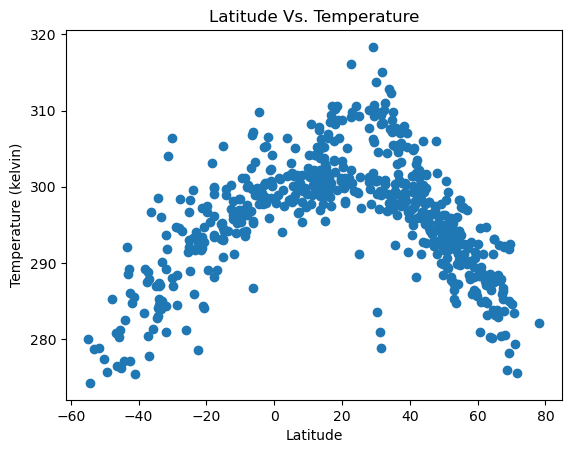

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (kelvin)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

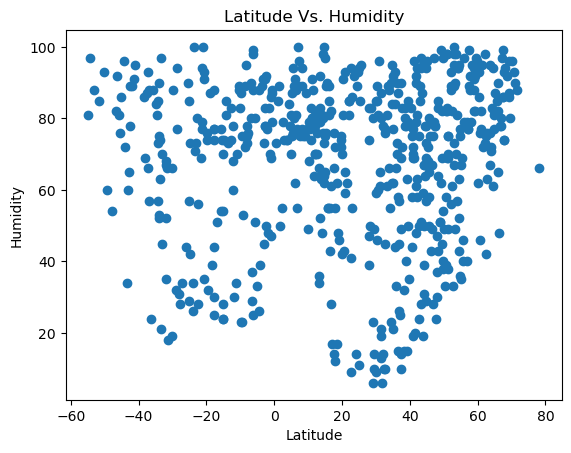

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

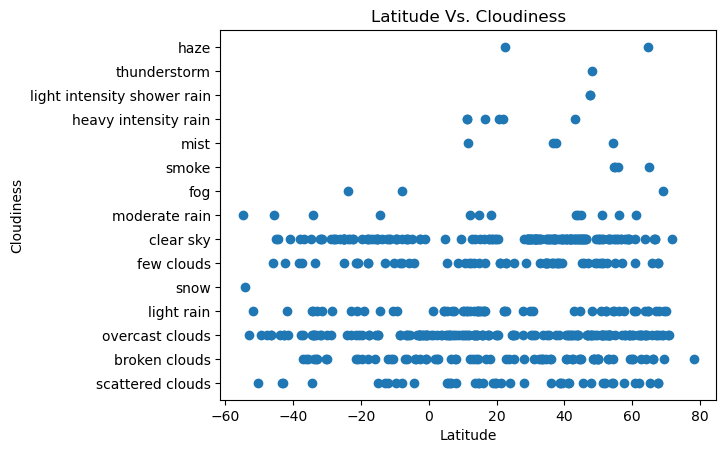

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

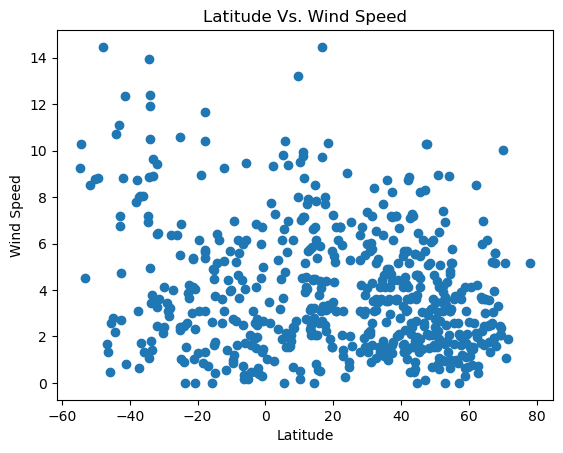

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
# Plot scatter plot
def lin_reg_plt(x_values, y_values, regress_values, rvalue, x_lab, y_lab):
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(7,11),fontsize=14,color="red")

    # Label plot
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [23]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,295.92,87,scattered clouds,2.73,ID,1690658079
1,port elizabeth,-33.9180,25.5701,287.33,52,broken clouds,10.51,ZA,1690657724
2,edinburgh of the seven seas,-37.0676,-12.3116,287.84,88,overcast clouds,8.03,SH,1690657601
3,puerto natales,-51.7236,-72.4875,278.87,85,light rain,8.51,CL,1690657599
4,nikolayevsk-on-amure,53.1406,140.7300,287.21,98,overcast clouds,1.69,RU,1690657646


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,nikolayevsk-on-amure,53.1406,140.7300,287.21,98,overcast clouds,1.69,RU,1690657646
6,wailua homesteads,22.0669,-159.3780,300.39,85,light rain,6.69,US,1690657602
9,zhangye,38.9342,100.4517,298.09,40,clear sky,3.62,CN,1690657485
10,praia da vitoria,38.7333,-27.0667,300.29,78,scattered clouds,2.00,PT,1690657505
13,machico,32.7000,-16.7667,300.38,76,few clouds,5.14,PT,1690658085


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waingapu,-9.6567,120.2641,295.92,87,scattered clouds,2.73,ID,1690658079
1,port elizabeth,-33.9180,25.5701,287.33,52,broken clouds,10.51,ZA,1690657724
2,edinburgh of the seven seas,-37.0676,-12.3116,287.84,88,overcast clouds,8.03,SH,1690657601
3,puerto natales,-51.7236,-72.4875,278.87,85,light rain,8.51,CL,1690657599
5,grytviken,-54.2811,-36.5092,274.23,97,snow,10.30,GS,1690657594


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.4486178871293024


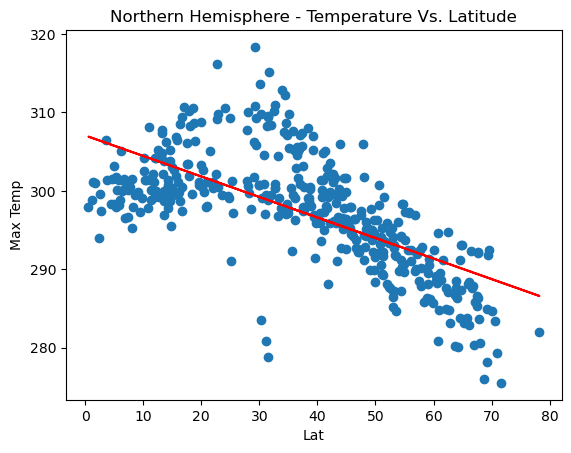

In [26]:
# Linear regression on Northern Hemisphere
x_values =northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.title("Northern Hemisphere - Temperature Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (kelvin)")
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Max Temp")
    
    

R squared: 0.6341039414633318


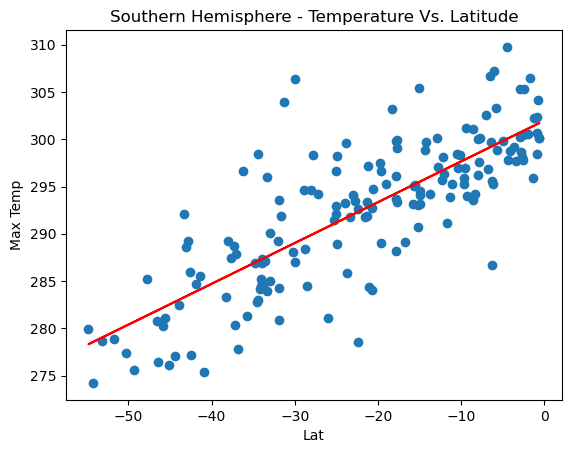

In [27]:
# Linear regression on Southern Hemisphere
x_values =southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.title("Southern Hemisphere - Temperature Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (kelvin)")

lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Max Temp")

The linear relationship is showing a strong relationship between latitute and temperature.  
The slope is positive towards the zero which makes sense becuase 0 is the earth's equater, where it is the hottest.
The southern hemisphere has a stronger relationship than the northern hemisphere when comparing the two examples. 

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.007535303110639246


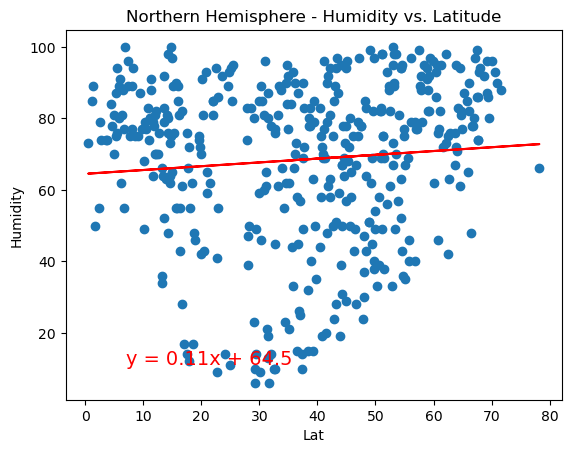

In [28]:
# Northern Hemisphere
x_values =northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Humidity")

R squared: 0.0061335041318521105


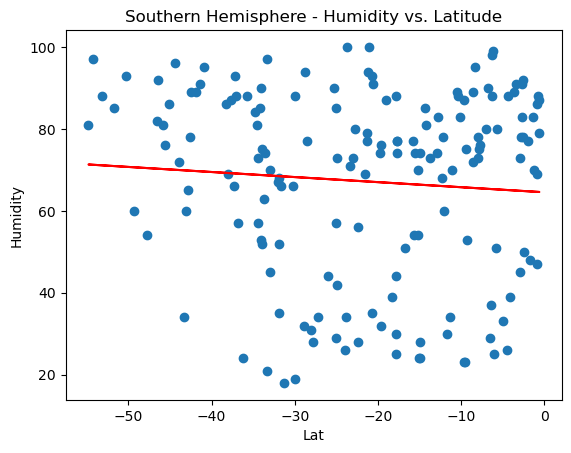

In [29]:
# Southern Hemisphere
x_values =southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Humidity")

There is not a strong relationship between latitude and humidity, this is scatterplot and r value is showing no correlation.


### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Cloudiness")

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].value_counts()

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Cloudiness")

I am not sure if a latitude linear regression plot is the best way to show cloudiness compared the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.054424660392381856


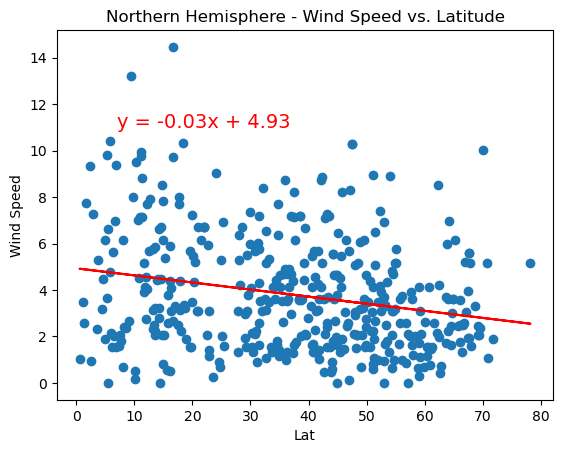

In [30]:
# Northern Hemisphere
x_values =northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (kelvin)")
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Wind Speed")

R squared: 0.14588375157236938


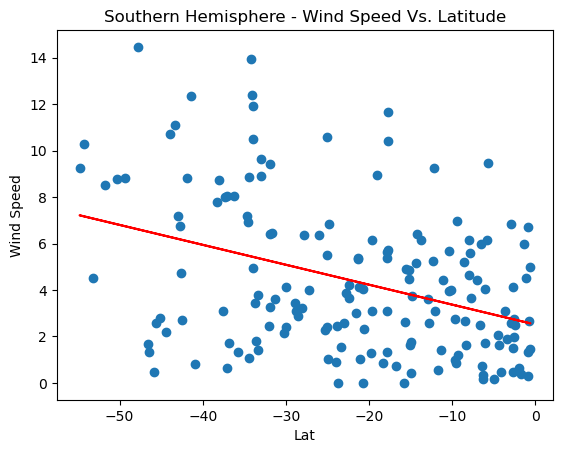

In [31]:
# Southern Hemisphere
x_values =southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.title("Southern Hemisphere - Wind Speed Vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lin_reg_plt(x_values, y_values, regress_values, rvalue, "Lat", "Wind Speed")

The regression lines for northern and southern hemispheres are showing a weak relationship for wind spreed and latitude.
The relationship is slightly higher in the southern hemisphere.